In [1]:
from __future__ import division
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import het_breushpagan
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
% matplotlib inline

In [23]:
energy = pd.read_csv('Energy_Performance.csv', na_values='?')

In [24]:
energy = energy.dropna()
energy.head()
#energy.pop('2014-15 Percent Better than National Median Site EUI')
#energy.pop('2014-15 Percent Better than National Median Source EUI')
energy.shape

(661, 9)

In [25]:
energy.head()

,Property_Type,ENERGY_STAR_Score,SiteEUI,SourceEUI,GHG_Emissions,GHG_Emissions_Intensity,Weather_Site_EUI,Weather_Source_EUI,Floor_Area
5,Office,95,36.3,99.9,238.0,2.8,36.9,100.6,97025
8,Office,89,55.1,158.0,2401.0,4.3,55.8,158.7,700079
19,Office,95,50.1,130.1,1063.7,3.7,51.7,131.8,286510
22,Office,91,53.7,145.2,1449.5,4.1,53.9,145.1,420700
25,Worship Facility,97,10.4,24.0,27.9,0.7,10.4,24.0,38051


In [26]:
Office = energy[energy['Property_Type'] == "Office"]
Worship_Facility = energy[energy['Property_Type'] == "Worship Facility"]
Bank_Branch = energy[energy['Property_Type'] == "Bank Branch"]
Data_Center = energy[energy['Property_Type'] == "Data Center"]
Distribution_Center = energy[energy['Property_Type'] == "Distribution Center"]
Financial_Office = energy[energy['Property_Type'] == "Financial Office"]
Hospital = energy[energy['Property_Type'] == 'Hospital (General Medical & Surgical)']
Hotel = energy[energy['Property_Type'] == 'Hotel']
School = energy[energy['Property_Type'] == 'K-12 School']
Medical_office = energy[energy['Property_Type'] == 'Medical Office']
Mixed_use_property = energy[energy['Property_Type'] == 'Mixed Use Property']
Multifamily_Housing = energy[energy['Property_Type'] == 'Multifamily Housing']
Non_Refrigerated_Warehouse = energy[energy['Property_Type'] == 'Non-Refrigerated Warehouse']
Other_Specialty_Hospital = energy[energy['Property_Type'] == 'Other - Specialty Hospital']
Refrigerated_Warehouse = energy[energy['Property_Type'] == 'Refrigerated Warehouse']
Retail_Store = energy[energy['Property_Type'] == 'Retail Store']
Senior_Care_Community = energy[energy['Property_Type'] == 'Senior Care Community']
Supermarket_Grocery_Store = energy[energy['Property_Type'] == 'Supermarket/Grocery Store']

In [74]:
print len(Office)
print len(Worship_Facility)
print len(Bank_Branch)
print len(Data_Center)
print len(Distribution_Center)
print len(Financial_Office)
print len(Hospital)
print len(Hotel)
print len(School)
print len(Medical_office)
print len(Mixed_use_property)
print len(Multifamily_Housing)
print len(Non_Refrigerated_Warehouse) 
print len(Other_Specialty_Hospital)
print len(Refrigerated_Warehouse)
print len(Retail_Store)
print len(Senior_Care_Community)
print len(Supermarket_Grocery_Store)

431
23
7
2
9
2
3
77
7
12
4
1
24
1
3
37
3
15


In [82]:
print np.mean(Office['ENERGY_STAR_Score'])
print np.mean(Worship_Facility['ENERGY_STAR_Score'])
print np.mean(Bank_Branch['ENERGY_STAR_Score'])
print np.mean(Data_Center['ENERGY_STAR_Score'])
print np.mean(Distribution_Center['ENERGY_STAR_Score'])
print np.mean(Financial_Office['ENERGY_STAR_Score'])
print np.mean(Hospital['ENERGY_STAR_Score'])
print np.mean(Hotel['ENERGY_STAR_Score'])
print np.mean(School['ENERGY_STAR_Score'])
print np.mean(Medical_office['ENERGY_STAR_Score'])
print np.mean(Mixed_use_property['ENERGY_STAR_Score'])
print np.mean(Multifamily_Housing['ENERGY_STAR_Score'])
print np.mean(Non_Refrigerated_Warehouse['ENERGY_STAR_Score']) 
print np.mean(Other_Specialty_Hospital['ENERGY_STAR_Score'])
print np.mean(Refrigerated_Warehouse['ENERGY_STAR_Score'])
print np.mean(Retail_Store['ENERGY_STAR_Score'])
print np.mean(Senior_Care_Community['ENERGY_STAR_Score'])
print np.mean(Supermarket_Grocery_Store['ENERGY_STAR_Score'])

79.1879350348
77.347826087
75.4285714286
10.5
58.0
77.0
49.0
58.3116883117
89.8571428571
61.1666666667
80.25
96.0
67.8333333333
88.0
17.3333333333
57.8918918919
57.0
29.2


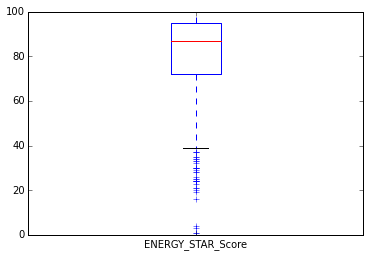

In [94]:
Office['ENERGY_STAR_Score'].plot(kind = 'box')

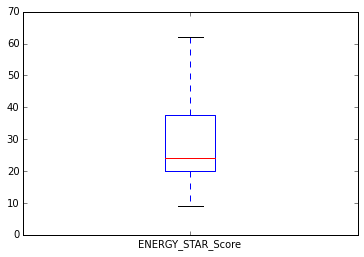

In [95]:
Supermarket_Grocery_Store['ENERGY_STAR_Score'].plot(kind = 'box')

In [27]:
categories = energy['Property_Type']

In [28]:
set(categories.values)

{'Bank Branch',
 'Data Center',
 'Distribution Center',
 'Financial Office',
 'Hospital (General Medical & Surgical)',
 'Hotel',
 'K-12 School',
 'Medical Office',
 'Mixed Use Property',
 'Multifamily Housing',
 'Non-Refrigerated Warehouse',
 'Office',
 'Other - Specialty Hospital',
 'Refrigerated Warehouse',
 'Retail Store',
 'Senior Care Community',
 'Supermarket/Grocery Store',
 'Worship Facility'}

In [29]:
Office.head()

,Property_Type,ENERGY_STAR_Score,SiteEUI,SourceEUI,GHG_Emissions,GHG_Emissions_Intensity,Weather_Site_EUI,Weather_Source_EUI,Floor_Area
5,Office,95,36.3,99.9,238.0,2.8,36.9,100.6,97025
8,Office,89,55.1,158.0,2401.0,4.3,55.8,158.7,700079
19,Office,95,50.1,130.1,1063.7,3.7,51.7,131.8,286510
22,Office,91,53.7,145.2,1449.5,4.1,53.9,145.1,420700
26,Office,63,95.2,192.0,499.8,6.3,94.5,189.7,94000


In [58]:
X = Office[[ 'SiteEUI', 'SourceEUI','GHG_Emissions','GHG_Emissions_Intensity','Weather_Site_EUI','Weather_Source_EUI','Floor_Area']]
X = sm.add_constant(X)
y = Office['ENERGY_STAR_Score']

model= sm.OLS(y,X)

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ENERGY_STAR_Score   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     115.8
Date:                Wed, 22 Jun 2016   Prob (F-statistic):           3.41e-94
Time:                        20:31:32   Log-Likelihood:                -1706.3
No. Observations:                 431   AIC:                             3429.
Df Residuals:                     423   BIC:                             3461.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     111.6197      1.776     62.844      0.000     108.129     115.111
SiteEUI                     0.6186      1.379      0.449      0.654      -2.092       3.329
SourceEUI                  -1.4938      0.901     -1.657      0.098      -3.266       0.278
GHG_Emissions               0.0010      0.002      0.511      0.609      -0.003       0.005
GHG_Emissions_Intensity     0.2824      3.504      0.081      0.936      -6.604       7.169
Weather_Site_EUI           -0.8187      1.356     -0.604      0.546      -3.485       1.847
Weather_Source_EUI          1.2815      0.903      1.419      0.157      -0.493       3.056
Floor_Area               2.513e-05   8.15e-06      3.081      0.002     9.1e-06    4.12e-05
==============================================================================
Omnibus:                       51.817   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.916
Skew:                          -0.759   Prob(JB):                     6.00e-19
Kurtosis:                       4.539   Cond. No.                     1.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
result.params

const                      111.619727
SiteEUI                      0.618579
SourceEUI                   -1.493758
GHG_Emissions                0.000955
GHG_Emissions_Intensity      0.282380
Weather_Site_EUI            -0.818716
Weather_Source_EUI           1.281544
Floor_Area                   0.000025
dtype: float64

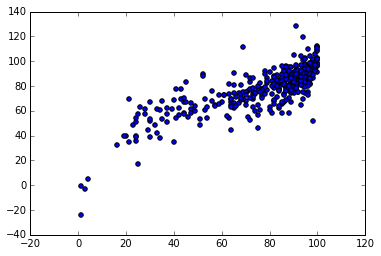

In [60]:
plt.scatter(Office['ENERGY_STAR_Score'], result.predict())
plt.show()

In [61]:
X = Worship_Facility[[ 'SiteEUI', 'SourceEUI','GHG_Emissions','GHG_Emissions_Intensity','Weather_Site_EUI','Weather_Source_EUI','Floor_Area']]
X = sm.add_constant(X)
y = Worship_Facility['ENERGY_STAR_Score']

model= sm.OLS(y,X)

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ENERGY_STAR_Score   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     4.175
Date:                Wed, 22 Jun 2016   Prob (F-statistic):            0.00967
Time:                        20:31:33   Log-Likelihood:                -98.599
No. Observations:                  23   AIC:                             213.2
Df Residuals:                      15   BIC:                             222.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     113.8416     20.970      5.429      0.000      69.146     158.538
SiteEUI                    41.6243     67.285      0.619      0.545    -101.790     185.039
SourceEUI                 -43.8497     63.793     -0.687      0.502    -179.822      92.123
GHG_Emissions               0.1385      0.368      0.377      0.712      -0.645       0.922
GHG_Emissions_Intensity   -34.2867     77.182     -0.444      0.663    -198.797     130.223
Weather_Site_EUI          -41.9717     67.387     -0.623      0.543    -185.603     101.659
Weather_Source_EUI         44.1122     63.644      0.693      0.499     -91.542     179.766
Floor_Area              -6.992e-05      0.001     -0.095      0.926      -0.002       0.002
==============================================================================
Omnibus:                       17.755   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.339
Skew:                          -1.502   Prob(JB):                     8.55e-06
Kurtosis:                       6.915   Cond. No.                     9.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
X = energy[[ 'SiteEUI', 'SourceEUI','GHG_Emissions','GHG_Emissions_Intensity','Weather_Site_EUI','Weather_Source_EUI','Floor_Area']]
X = sm.add_constant(X)
y = energy['ENERGY_STAR_Score']

model= sm.OLS(y,X)

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ENERGY_STAR_Score   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     60.25
Date:                Wed, 22 Jun 2016   Prob (F-statistic):           1.28e-66
Time:                        20:58:42   Log-Likelihood:                -2926.7
No. Observations:                 661   AIC:                             5869.
Df Residuals:                     653   BIC:                             5905.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      88.4694      1.602     55.235      0.000      85.324      91.614
SiteEUI                     0.7217      1.522      0.474      0.636      -2.267       3.710
SourceEUI                  -1.6981      1.006     -1.688      0.092      -3.674       0.278
GHG_Emissions               0.0068      0.001      5.096      0.000       0.004       0.009
GHG_Emissions_Intensity    -4.4375      4.963     -0.894      0.372     -14.183       5.308
Weather_Site_EUI           -0.7857      1.506     -0.522      0.602      -3.743       2.171
Weather_Source_EUI          1.7268      1.007      1.715      0.087      -0.250       3.704
Floor_Area              -5.438e-06   6.56e-06     -0.829      0.407   -1.83e-05    7.43e-06
==============================================================================
Omnibus:                       89.648   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.790
Skew:                          -0.887   Prob(JB):                     1.62e-31
Kurtosis:                       4.416   Cond. No.                     1.74e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

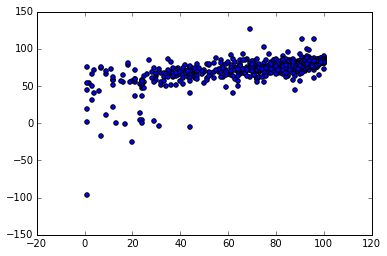

In [81]:
plt.scatter(energy['ENERGY_STAR_Score'],result.predict())